# Setup

In [6]:
import numpy as np
import pandas as pd

| code | Description |
|------|-------------|
| CRIM    | per capita crime rate by town|
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS   | proportion of non-retail business acres per town|
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
| NOX     | nitric oxides concentration (parts per 10 million)|
| RM      | average number of rooms per dwelling|
| AGE     | proportion of owner-occupied units built prior to 1940|
| DIS     | weighted distances to five Boston employment centres|
| RAD     | index of accessibility to radial highways|
| TAX     | full-value property-tax rate per $10,000|
| PTRATIO | pupil-teacher ratio by town|
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
| LSTAT   | percentage lower status of the population |
| MEDV    | Median value of owner-occupied homes in 1000's|

In [8]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

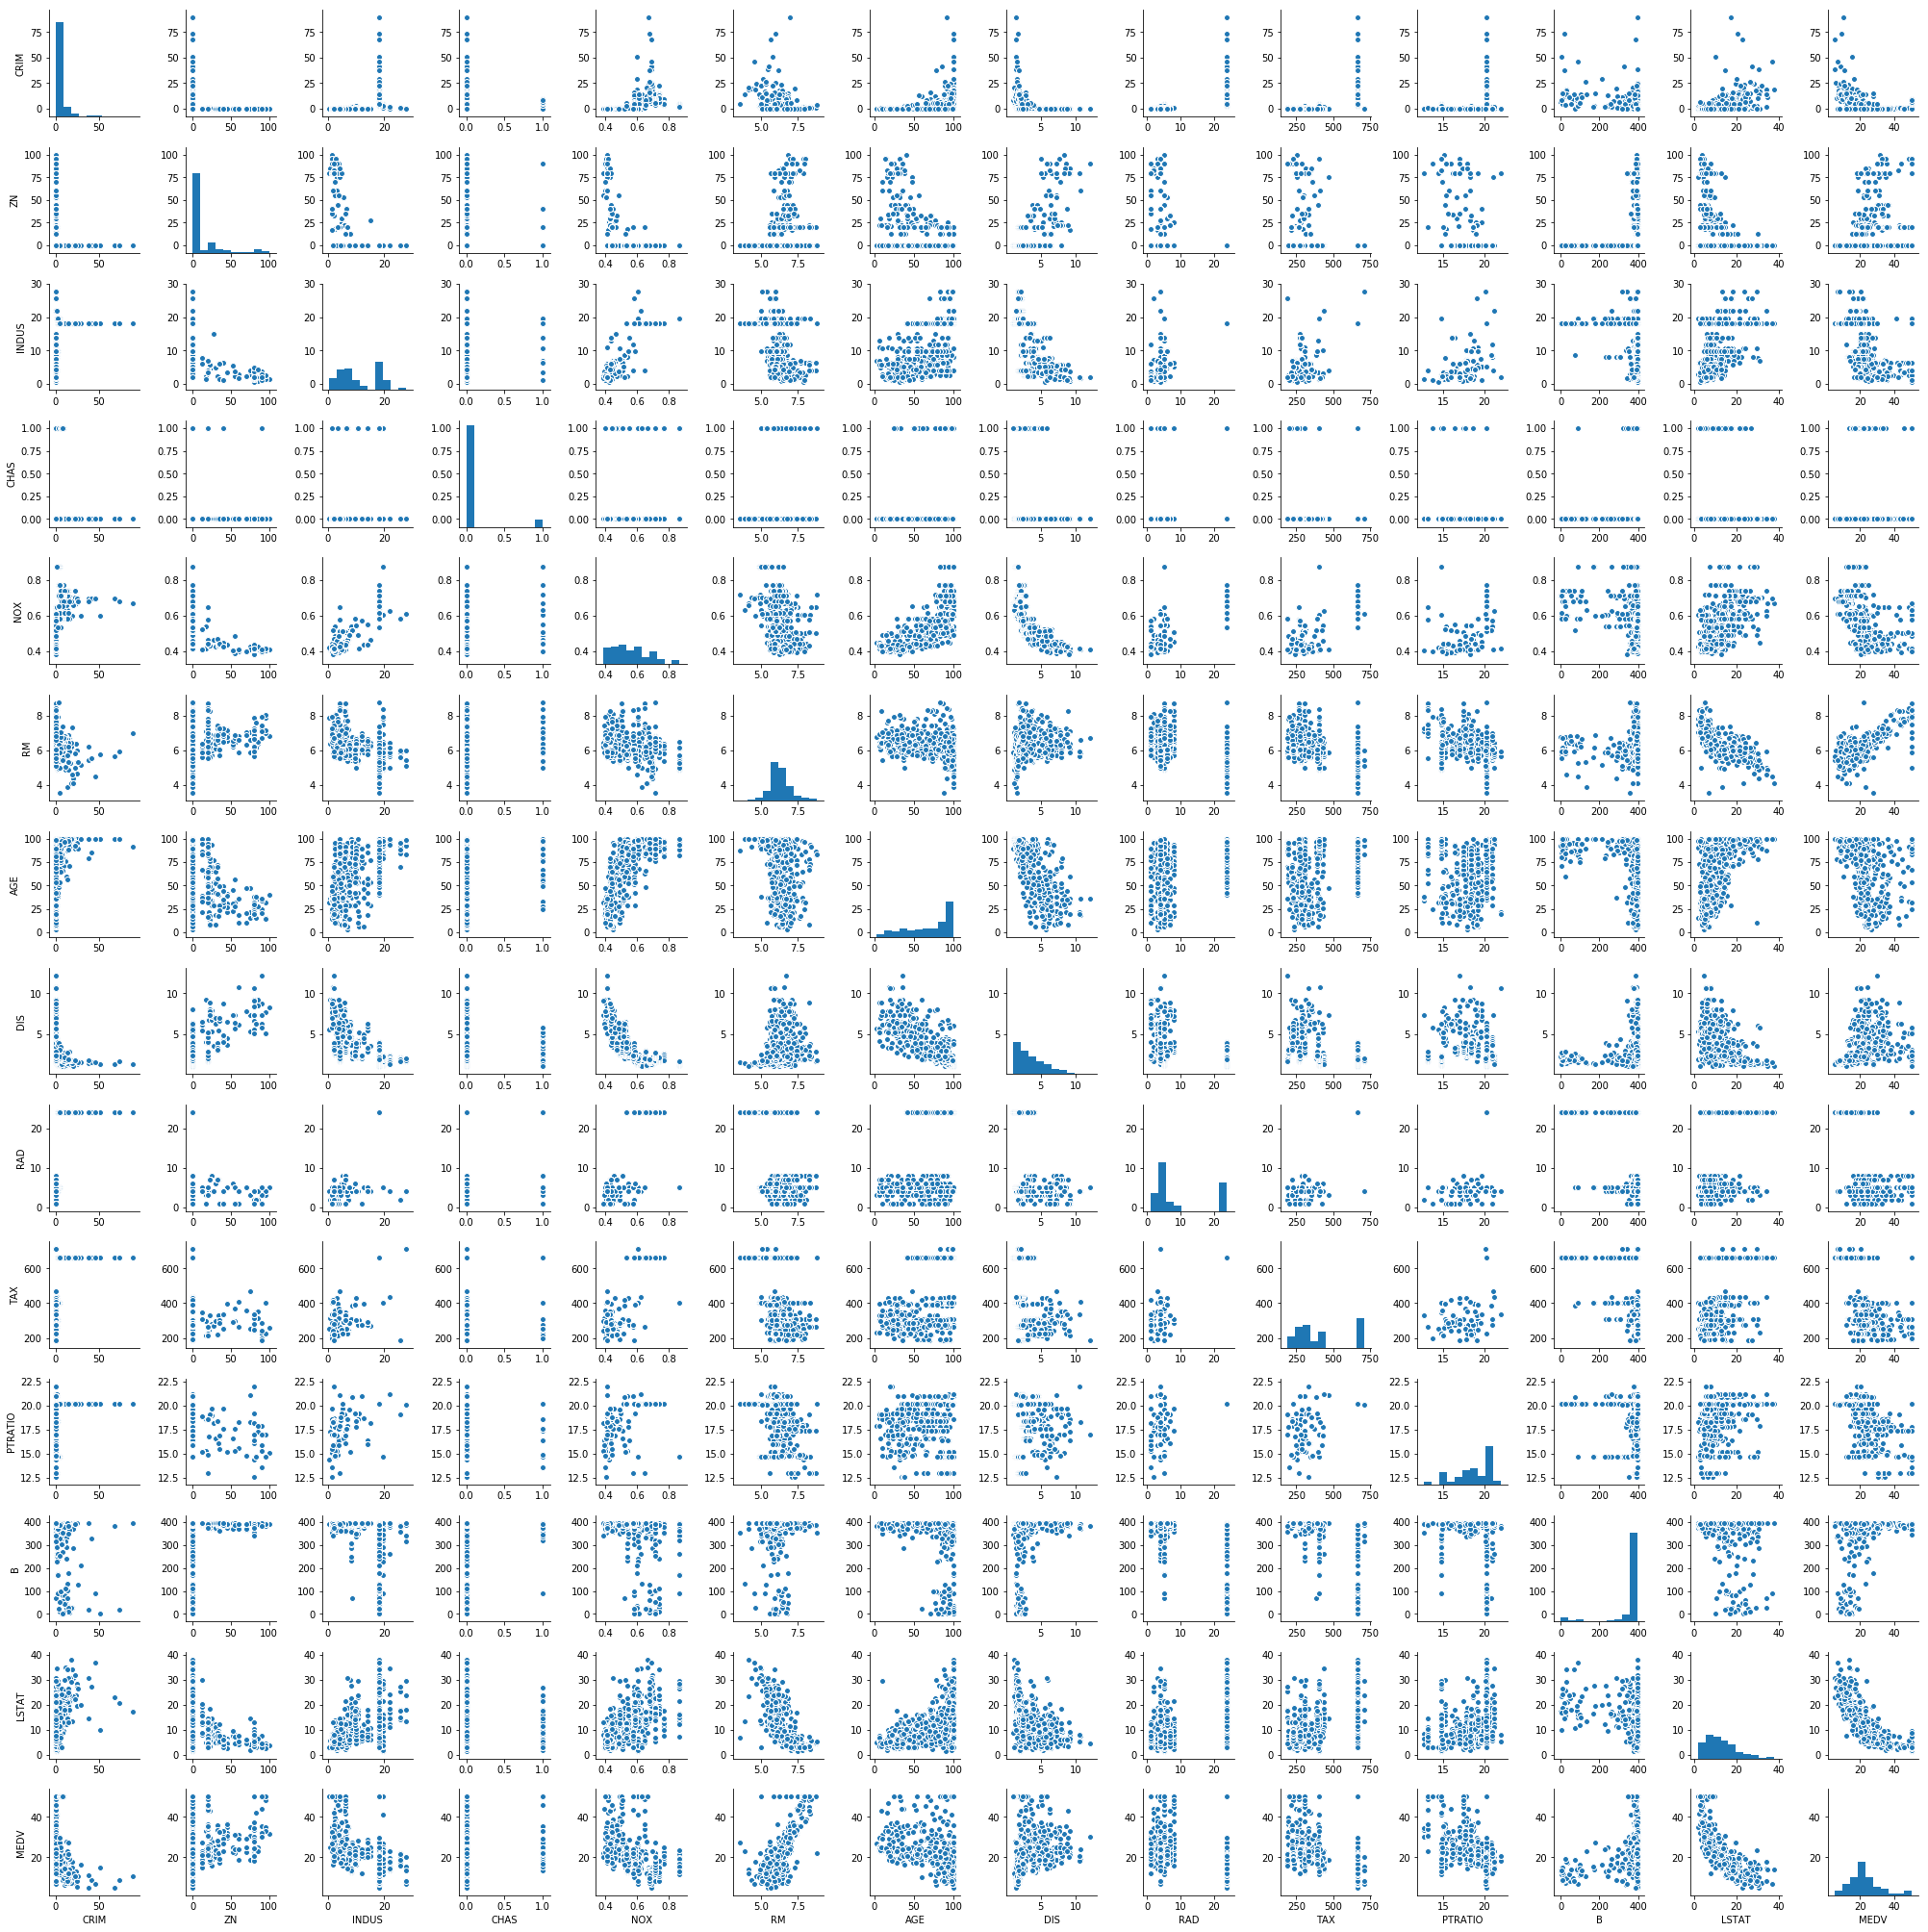

In [11]:
sns.pairplot(df, size=2)
plt.show()

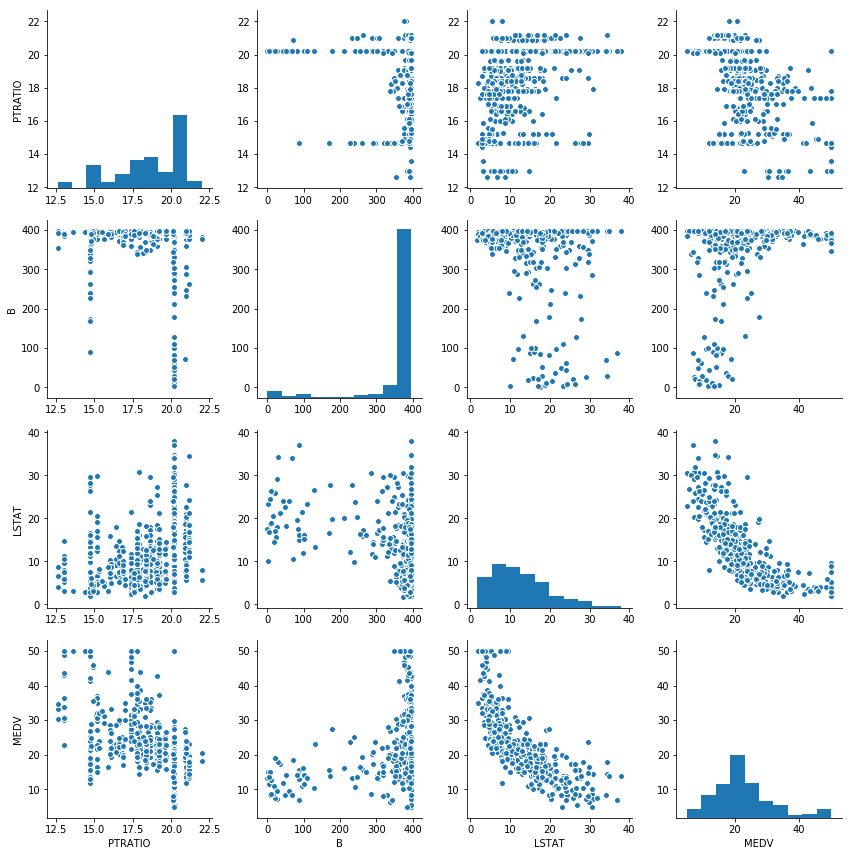

In [15]:
study_cols = ['PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[study_cols], size=3)
plt.show()

# Correlation Analysis and Feature Selection

In [18]:
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


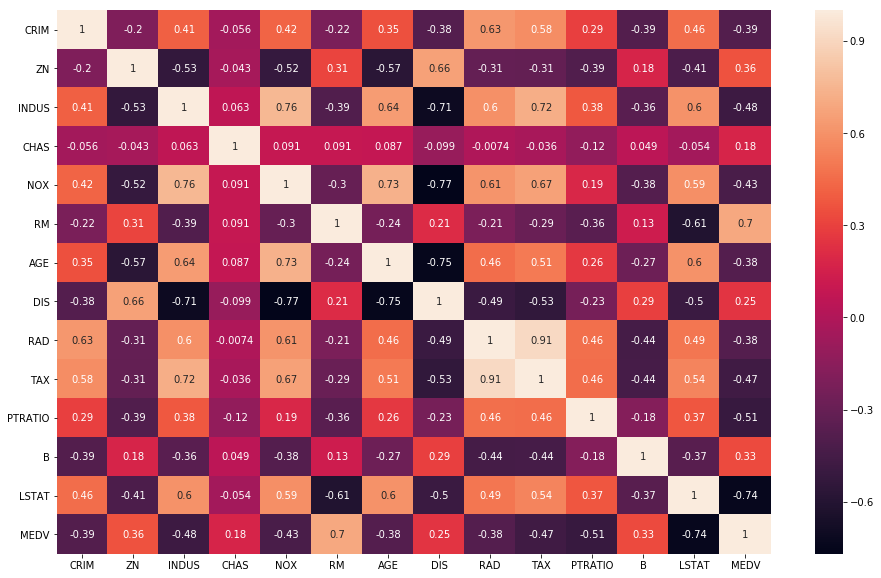

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

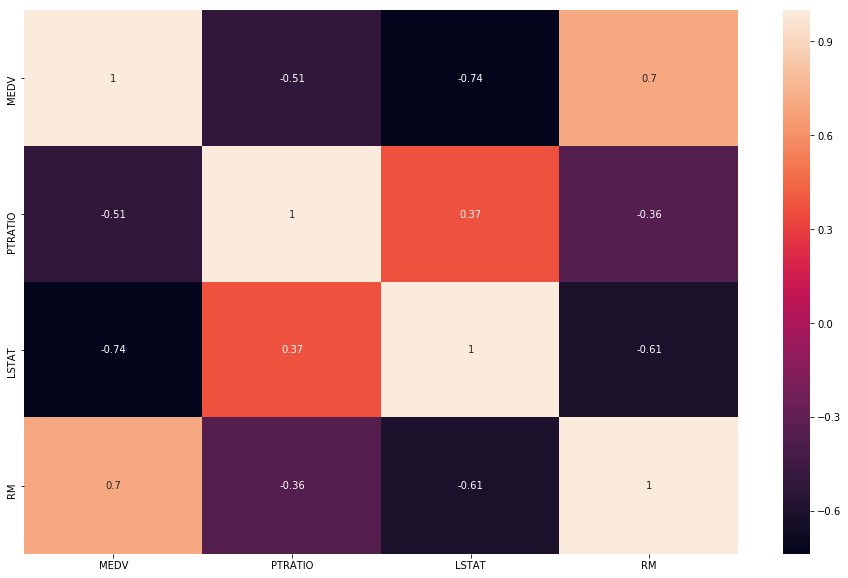

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['MEDV', 'PTRATIO', 'LSTAT', 'RM']].corr(), annot=True)
plt.show()

# Linear Regression with Scikit-Learn

In [25]:
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
model.coef_

array([ 9.10210898])

In [35]:
model.intercept_

-34.670620776438554

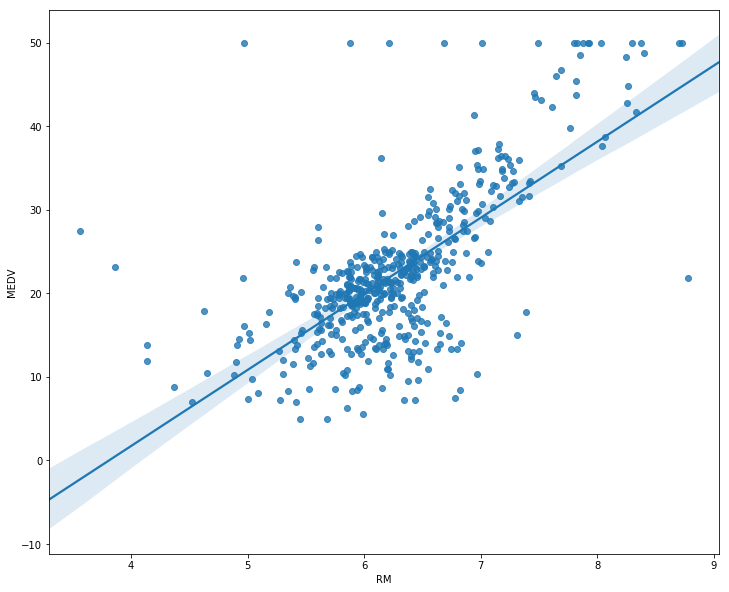

In [40]:
plt.figure(figsize=(12,10))
sns.regplot(x,y)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

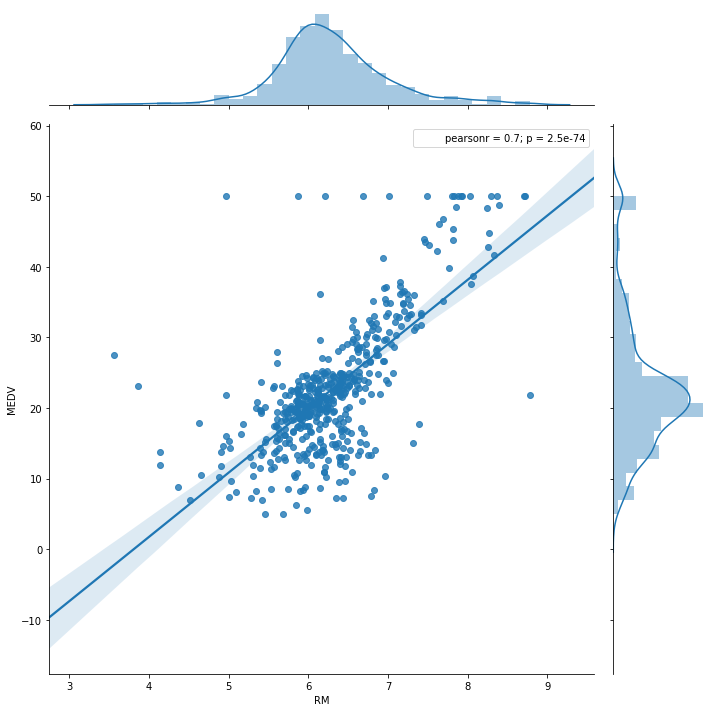

In [39]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', size=10)
plt.show()

In [44]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model.coef_

array([-0.95004935])

In [46]:
model.intercept_

34.553840879383102

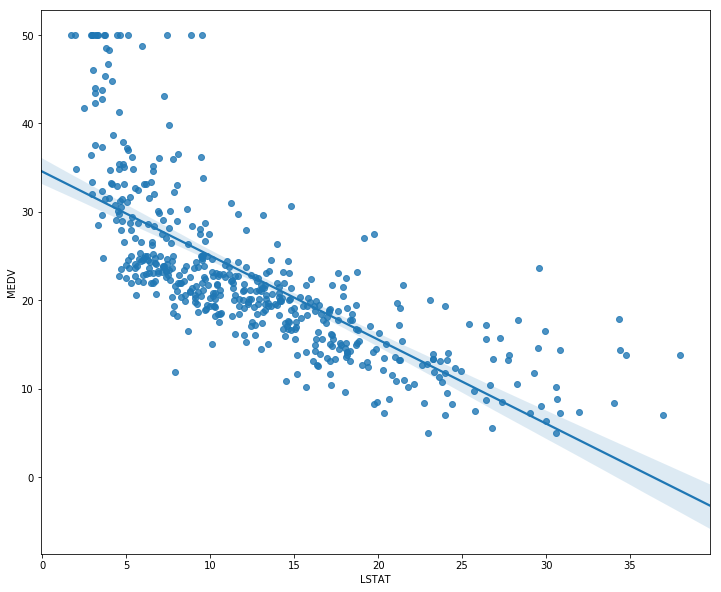

In [47]:
plt.figure(figsize=(12,10))
sns.regplot(x,y)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

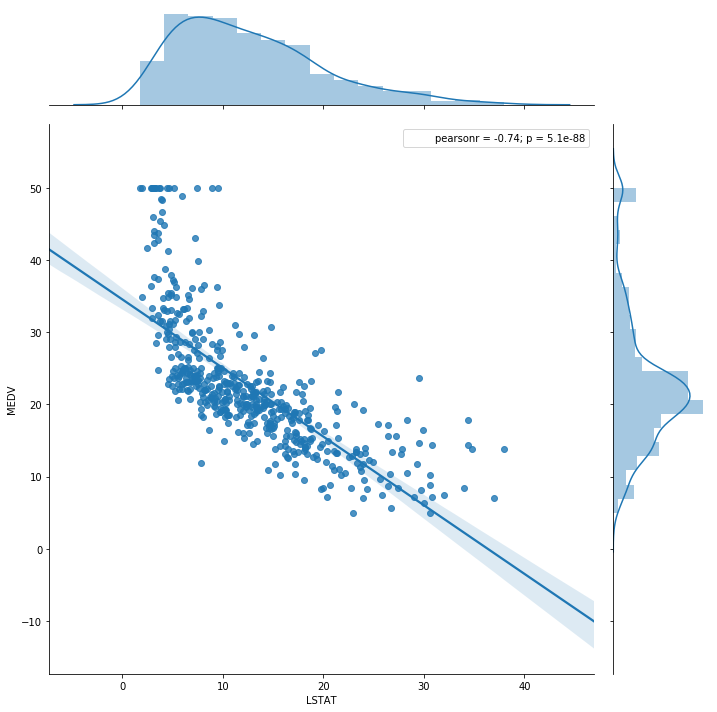

In [49]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', size=10)
plt.show()

***

# Robust Regression 

In [69]:
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [70]:
from sklearn.linear_model import RANSACRegressor

In [79]:
ransac = RANSACRegressor()
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [82]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [83]:
line_x = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_x.reshape(-1,1))

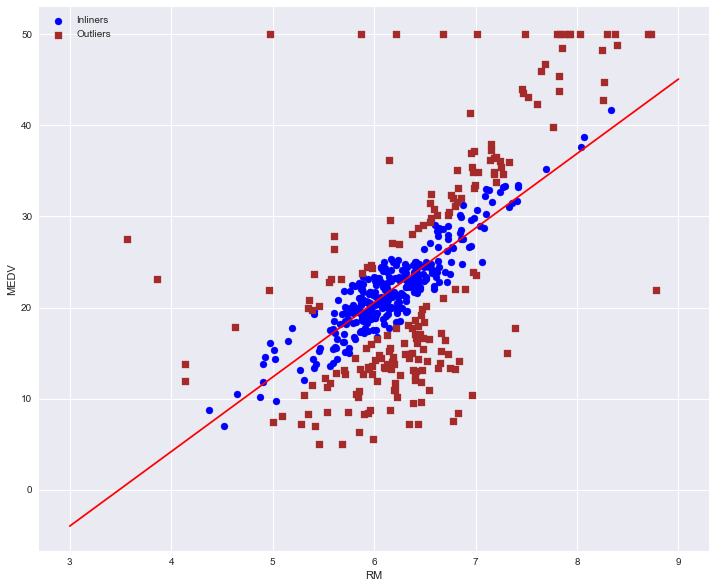

In [84]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(x[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliners')
plt.scatter(x[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_x, line_y_ransac, color='red')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(loc='upper left')
plt.show()

In [85]:
ransac.estimator_.coef_

array([ 8.17606776])

In [86]:
ransac.estimator_.intercept_

-28.513110414154607

***

# Performance Evaluation of Regression Model

In [87]:
from sklearn.model_selection import train_test_split

In [90]:
x = df['LSTAT'].values.reshape(-1,1)
# x = df.iloc[:, :-1].values  # muliple input features
y = df['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [92]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

## Method 1: Residual Analysis

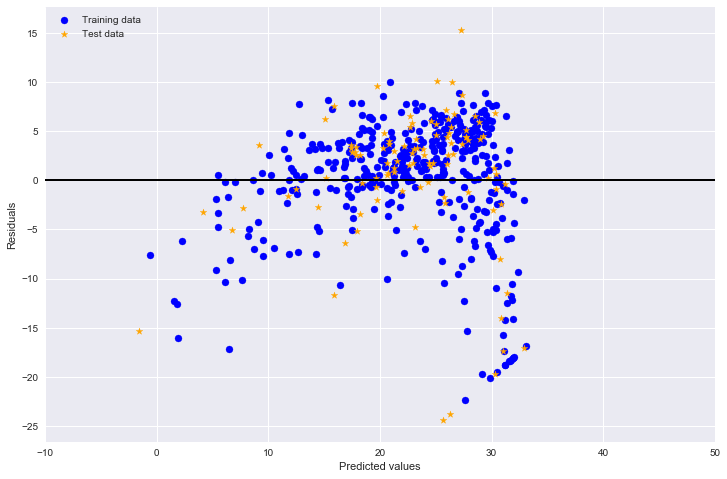

In [94]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

## Method 2: Mean Squared Error (MSE)

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
mean_squared_error(y_train, y_train_pred)

36.523966406959666

In [97]:
mean_squared_error(y_test, y_test_pred)

46.336305360025918

## Method 3: Coefficient of Determination, R^2

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [100]:
r2_score(y_test, y_test_pred)

0.43095672846187616

***
# What does a near perfect model look like?

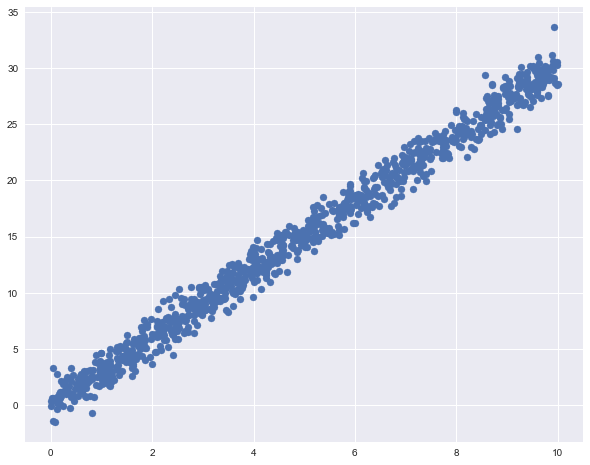

In [108]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [112]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train.reshape(-1,1), y_train)

y_train_pred = model.predict(x_train.reshape(-1,1))
y_test_pred = model.predict(x_test.reshape(-1,1))

## Method 1: Residual Analysis

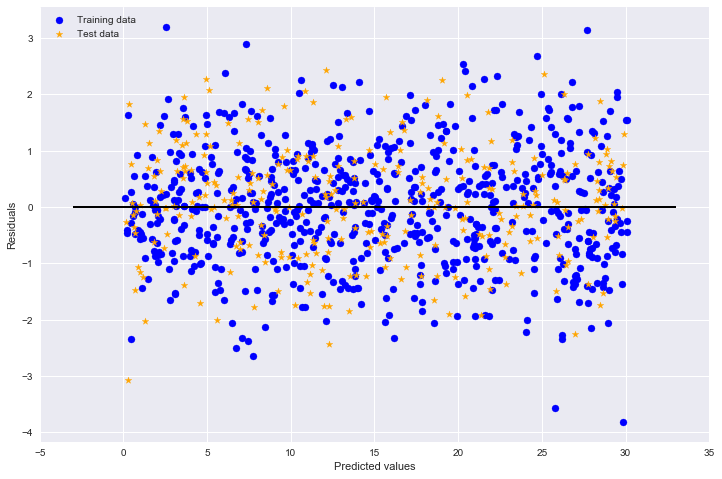

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.show()

## Method 2: Mean Squared Error

In [114]:
mean_squared_error(y_train, y_train_pred)

1.0541664966057387

In [115]:
mean_squared_error(y_test, y_test_pred)

0.97549157901042916

## Method 3: Coefficent of Determination, R^2

In [116]:
r2_score(y_train, y_train_pred)

0.98621986501686143

In [117]:
r2_score(y_test, y_test_pred)

0.98750052216176276